In [120]:
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [121]:
data = pd.read_csv("./samples.csv", usecols=["decoded","encoded"])
decoded_t = torch.tensor(data['decoded'].values)
encoded_t = torch.tensor(data['encoded'].values)

In [122]:
def model(x: torch.Tensor, w1: torch.Tensor, w2: torch.Tensor, b: torch.Tensor):
    return w1 * x**2 + w2*x + b

def lossFn(y: torch.Tensor, y_pred: torch.Tensor):
    return ((y - y_pred)**2).mean()

In [123]:
threshold = int(0.8 * decoded_t.shape[0])
train_decoded = decoded_t[:threshold]
train_encoded = encoded_t[:threshold]

test_decoded = decoded_t[threshold:]
test_encoded = encoded_t[threshold:]

In [134]:
def train(params: torch.Tensor, epochs, lr):
    bestLoss = float('inf')
    bestParams = params.clone()
    
    optimizer = torch.optim.Adam([params], lr)
    for i in range(epochs):
        encoded_pred = model(train_decoded, *params)
        loss = lossFn(train_encoded, encoded_pred)

        if loss.item() < bestLoss:
            bestLoss = loss.item()
            bestParams = params.clone()


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i % 700 == 0):
            print(loss)
    return bestParams

In [136]:
epochs = 20000
lr = 0.1
paramsCount = 3
params = torch.tensor([0. for _ in range(paramsCount)], requires_grad=True)

params = train(params, epochs, lr)
params

tensor(5.5895e+08, grad_fn=<MeanBackward0>)
tensor(47255.3555, grad_fn=<MeanBackward0>)
tensor(37159.0781, grad_fn=<MeanBackward0>)
tensor(25283.4648, grad_fn=<MeanBackward0>)
tensor(14231.8467, grad_fn=<MeanBackward0>)
tensor(6181.8101, grad_fn=<MeanBackward0>)
tensor(1879.4508, grad_fn=<MeanBackward0>)
tensor(362.5156, grad_fn=<MeanBackward0>)
tensor(58.7653, grad_fn=<MeanBackward0>)
tensor(28.3419, grad_fn=<MeanBackward0>)
tensor(23.4991, grad_fn=<MeanBackward0>)
tensor(18.7694, grad_fn=<MeanBackward0>)
tensor(13.6434, grad_fn=<MeanBackward0>)
tensor(8.6724, grad_fn=<MeanBackward0>)
tensor(4.5569, grad_fn=<MeanBackward0>)
tensor(1.8257, grad_fn=<MeanBackward0>)
tensor(0.4970, grad_fn=<MeanBackward0>)
tensor(0.6919, grad_fn=<MeanBackward0>)
tensor(101.3288, grad_fn=<MeanBackward0>)
tensor(31.4706, grad_fn=<MeanBackward0>)
tensor(0.0045, grad_fn=<MeanBackward0>)
tensor(0.0167, grad_fn=<MeanBackward0>)
tensor(0.4440, grad_fn=<MeanBackward0>)
tensor(0.9698, grad_fn=<MeanBackward0>)
tens

tensor([ 5.0000, 20.0000, 30.0001], grad_fn=<CloneBackward0>)

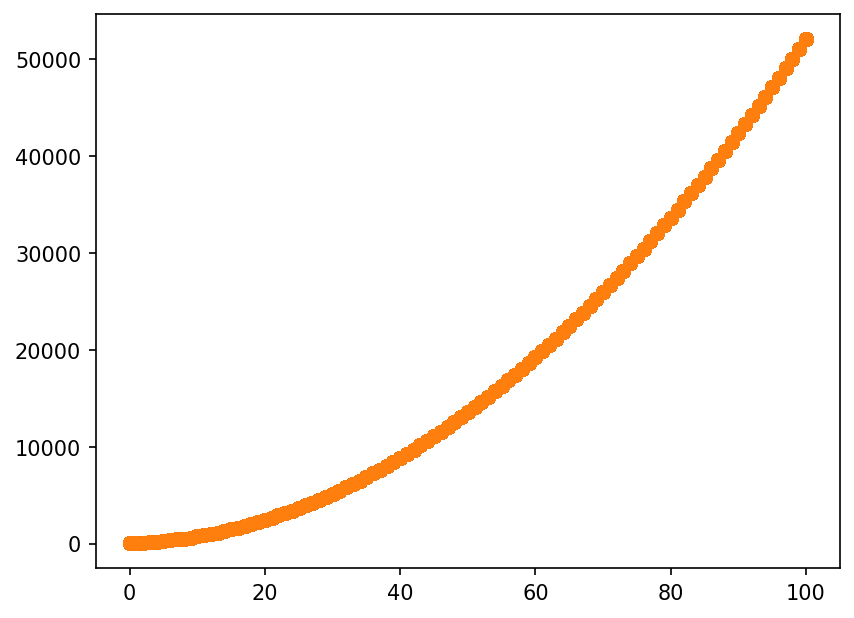

In [137]:
encoded_pred = model(decoded_t, *params).detach()

fig = plt.figure(dpi=150)
plt.plot(decoded_t, encoded_t, 'o')
plt.plot(decoded_t, encoded_pred, 'o')

In [138]:
def encoded_to_decoded(encoded_pin: torch.Tensor, w1: torch.Tensor, w2: torch.Tensor, b: torch.Tensor):
    # Calculate discriminant
    discriminant = w2**2 - 4 * w1 * (b - encoded_pin)
    
    # Check if discriminant is negative
    if discriminant >= 0:
        sqrt_discriminant = torch.sqrt(discriminant)
    else:
        sqrt_discriminant = torch.sqrt(discriminant + 0j)  # Add 0j to handle complex numbers
    
    # Calculate both roots
    x1 = (-w2 + sqrt_discriminant) / (2 * w1)
    x2 = (-w2 - sqrt_discriminant) / (2 * w1)
    
    return max(x1.item(), x2.item())

    
decoded_pred = torch.tensor([encoded_to_decoded(encoded, *params) for encoded in test_encoded])
lossFn(test_decoded, decoded_pred)

tensor(3.2681e-13)